In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

/Users/noahgift/.pragai7/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
attendance_valuation_elo_df = pd.read_csv("../data/nba_2017_att_val_elo.csv");attendance_valuation_elo_df.head()

,Unnamed: 0,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East


In [6]:
salary_df = pd.read_csv("../data/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [7]:
pie_df = pd.read_csv("../data/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [8]:
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [9]:
br_stats_df = pd.read_csv("../data/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [10]:
plus_minus_df.rename(columns={"NAME":"PLAYER", "WINS": "WINS_RPM"}, inplace=True)
players = []
for player in plus_minus_df["PLAYER"]:
    plyr, _ = player.split(",")
    players.append(plyr)
plus_minus_df.drop(["PLAYER"], inplace=True, axis=1)
plus_minus_df["PLAYER"] = players
plus_minus_df.head()

,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PLAYER
0,CLE,74,37.8,6.49,1.93,8.42,20.43,LeBron James
1,GS,79,33.4,7.27,0.14,7.41,18.80,Stephen Curry
2,CHI,76,37.0,4.82,1.80,6.62,17.35,Jimmy Butler
3,OKC,81,34.6,6.74,-0.47,6.27,17.34,Russell Westbrook
4,GS,76,32.5,1.55,5.59,7.14,16.84,Draymond Green


In [11]:
nba_players_df = br_stats_df.copy()
nba_players_df.rename(columns={'Player': 'PLAYER','Pos':'POSITION', 'Tm': "TEAM", 'Age': 'AGE', "PS/G": "POINTS"}, inplace=True)
nba_players_df.drop(["G", "GS", "TEAM"], inplace=True, axis=1)
nba_players_df = nba_players_df.merge(plus_minus_df, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,2.4,1.8,27.3,TOR,74,35.4,2.21,-2.04,0.17,5.46


In [12]:
pie_df_subset = pie_df[["PLAYER", "PIE", "PACE", "W"]].copy()
nba_players_df = nba_players_df.merge(pie_df_subset, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


In [13]:
nba_players_df.to_csv("../data/nba_2017_players_stats_combined.csv")

In [14]:
salary_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
salary_df["SALARY_MILLIONS"] = round(salary_df["SALARY"]/1000000, 2)
salary_df.drop(["POSITION","TEAM", "SALARY"], inplace=True, axis=1)
salary_df.head()

,PLAYER,SALARY_MILLIONS
0,LeBron James,30.96
1,Mike Conley,26.54
2,Al Horford,26.54
3,Dirk Nowitzki,25.00
4,Carmelo Anthony,24.56


In [15]:
diff = list(set(nba_players_df["PLAYER"].values.tolist()) - set(salary_df["PLAYER"].values.tolist()))

In [16]:
len(diff)

111

In [17]:
print(diff)

['Patrick Beverley', 'Brian Roberts', 'Hassan Whiteside', 'Raymond Felton', 'Alex Poythress', 'James Michael McAdoo', 'Mike Muscala', 'Terrence Jones', 'C.J. Watson', 'Metta World Peace', 'Jonathon Simmons', 'Seth Curry', 'Omri Casspi', 'Alan Williams', 'David Nwaba', 'Tyler Ulis', 'Richard Jefferson', 'Patricio Garino', 'Norris Cole', 'Thomas Robinson', 'Daniel Ochefu', 'Ben Bentil', 'Stephen Zimmerman', 'Chris Andersen', 'Damjan Rudez', 'Sasha Vujacic', 'Anderson Varejao', 'Shawn Long', 'Dahntay Jones', 'Robert Covington', 'JaMychal Green', 'Davis Bertans', 'Jose Calderon', 'Alan Anderson', 'Matt Barnes', 'Zaza Pachulia', 'Dorian Finney-Smith', 'Josh Huestis', 'Cheick Diallo', 'Anthony Tolliver', 'Jerami Grant', 'Nicolas Brussino', 'Michael Gbinije', 'Spencer Dinwiddie', 'Jeff Withey', 'Darrun Hilliard', 'Malcolm Brogdon', 'Chinanu Onuaku', 'Harrison Barnes', 'Gerald Green', 'Willie Reed', 'Chris McCullough', 'Justin Holiday', 'Isaiah Taylor', 'Kyle Wiltjer', 'Luke Babbitt', 'Beno Ud

In [18]:
nba_players_with_salary_df = nba_players_df.merge(salary_df); nba_players_with_salary_df.to_csv("../data/nba_2017_nba_players_with_salary.csv")

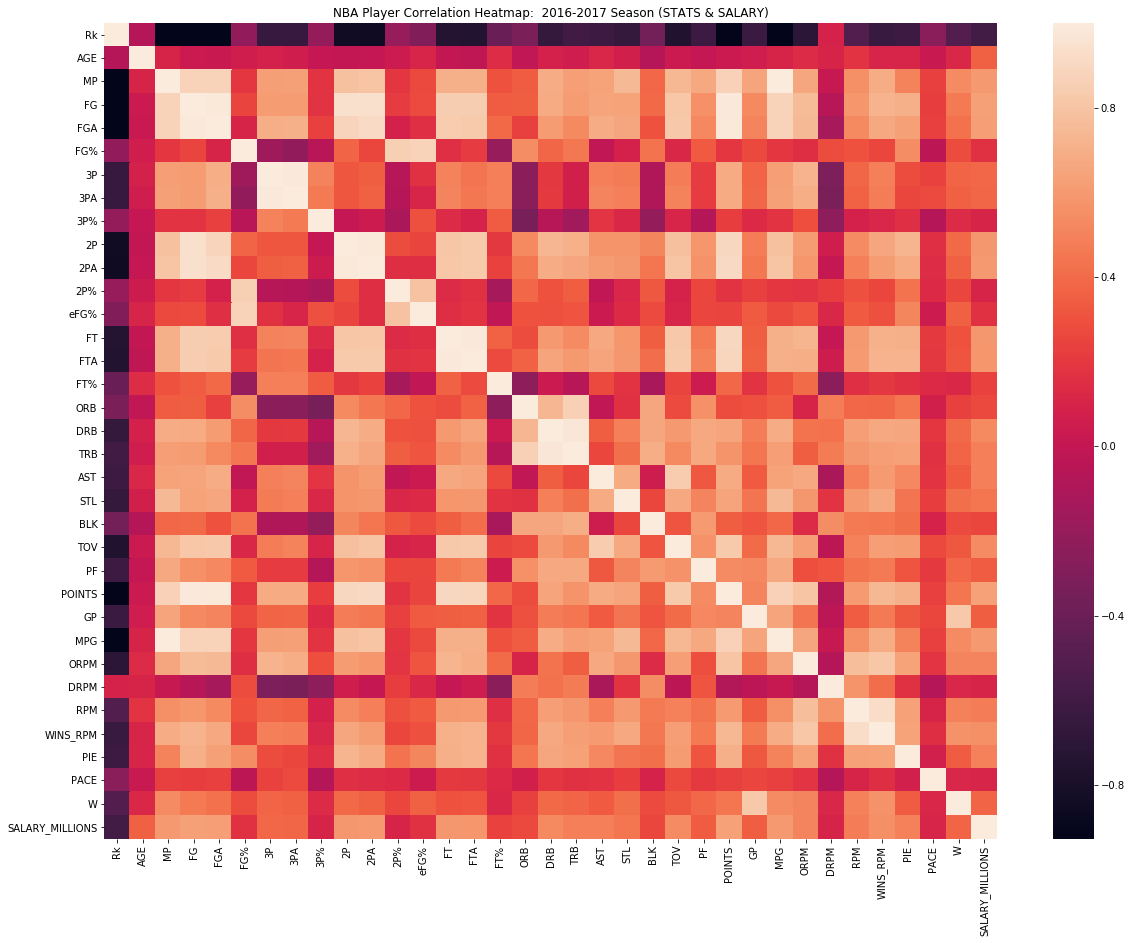

In [19]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season (STATS & SALARY)")
corr = nba_players_with_salary_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
nba_players_with_salary_df.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,320.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,217.269006,26.444444,21.572515,3.483626,7.725439,0.446096,0.865789,2.440058,0.307016,2.620175,...,58.198830,21.572807,-0.676023,-0.005789,-0.681813,2.861725,9.186842,98.341053,28.950292,7.294006
std,136.403138,4.295686,8.804018,2.200872,4.646933,0.078992,0.780010,2.021716,0.134691,1.828714,...,22.282015,8.804121,2.063237,1.614293,2.522014,3.880914,3.585475,2.870091,14.603876,6.516326
min,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,-1.600000,87.460000,0.000000,0.030000
25%,100.250000,23.000000,15.025000,1.800000,4.225000,0.402250,0.200000,0.800000,0.280250,1.200000,...,43.500000,15.025000,-2.147500,-1.222500,-2.422500,0.102500,7.100000,96.850000,19.000000,2.185000
50%,205.500000,26.000000,21.650000,3.000000,6.700000,0.442000,0.700000,2.200000,0.340500,2.200000,...,66.000000,21.650000,-0.990000,-0.130000,-1.170000,1.410000,8.700000,98.205000,29.000000,4.920000
75%,327.750000,29.000000,29.075000,4.700000,10.400000,0.481000,1.400000,3.600000,0.373500,3.700000,...,76.000000,29.075000,0.257500,1.067500,0.865000,4.487500,10.900000,100.060000,39.000000,11.110000
max,482.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,9.700000,...,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,109.870000,66.000000,30.960000


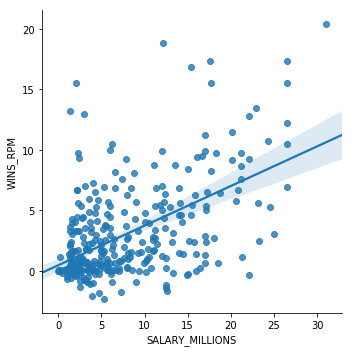

In [21]:
sns.lmplot(x="SALARY_MILLIONS", y="WINS_RPM", data=nba_players_with_salary_df)

In [22]:
results = smf.ols('W ~POINTS', data=nba_players_with_salary_df).fit()

In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     84.74
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           3.57e-18
Time:                        16:29:49   Log-Likelihood:                -1363.7
No. Observations:                 342   AIC:                             2731.
Df Residuals:                     340   BIC:                             2739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1105      1.282     14.908      0.0

In [24]:
results = smf.ols('W ~WINS_RPM', data=nba_players_with_salary_df).fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     162.9
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           9.34e-31
Time:                        16:29:50   Log-Likelihood:                -1334.8
No. Observations:                 342   AIC:                             2674.
Df Residuals:                     340   BIC:                             2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8208      0.808     28.233      0.0

In [26]:
results = smf.ols('SALARY_MILLIONS ~POINTS', data=nba_players_with_salary_df).fit()

In [27]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           4.49e-40
Time:                        16:29:52   Log-Likelihood:                -1037.4
No. Observations:                 342   AIC:                             2079.
Df Residuals:                     340   BIC:                             2086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0479      0.494      2.123      0.0

In [28]:
results = smf.ols('SALARY_MILLIONS ~WINS_RPM', data=nba_players_with_salary_df).fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           1.86e-28
Time:                        16:29:52   Log-Likelihood:                -1064.1
No. Observations:                 342   AIC:                             2132.
Df Residuals:                     340   BIC:                             2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6501      0.366     12.695      0.0

In [30]:
from ggplot import *

/Users/noahgift/.pragai7/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/noahgift/.pragai7/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


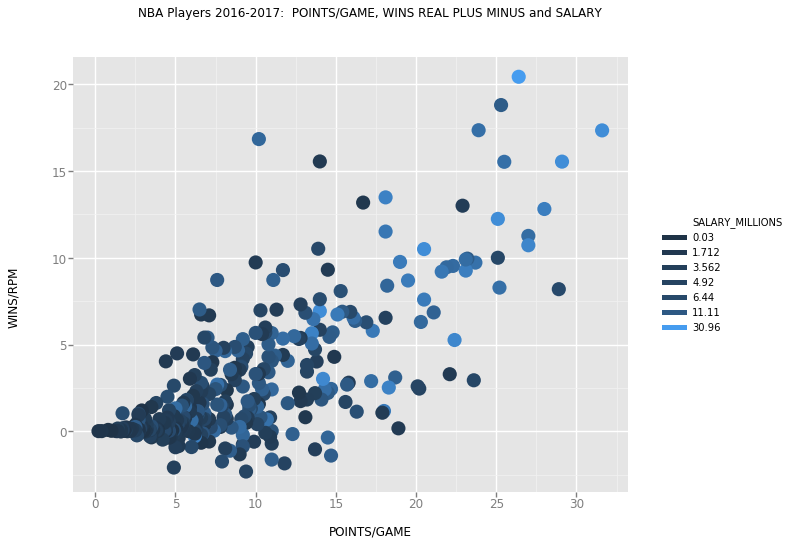

<ggplot: (279882325)>

In [31]:
p = ggplot(nba_players_with_salary_df,aes(x="POINTS", y="WINS_RPM", color="SALARY_MILLIONS")) + geom_point(size=200)
p + xlab("POINTS/GAME") + ylab("WINS/RPM") + ggtitle("NBA Players 2016-2017:  POINTS/GAME, WINS REAL PLUS MINUS and SALARY") 

In [32]:
wiki_df = pd.read_csv("../data/nba_2017_player_wikipedia.csv");wiki_df.head()


,Unnamed: 0,names,pageviews,timestamps,wikipedia_handles
0,0,Russell Westbrook,3400,2016010100,Russell_Westbrook
1,1,Russell Westbrook,2893,2016010200,Russell_Westbrook
2,2,Russell Westbrook,3209,2016010300,Russell_Westbrook
3,3,Russell Westbrook,2531,2016010400,Russell_Westbrook
4,4,Russell Westbrook,2599,2016010500,Russell_Westbrook


In [33]:
wiki_df.rename(columns={'names': 'PLAYER', "pageviews": "PAGEVIEWS"}, inplace=True)

In [34]:
median_wiki_df = wiki_df.groupby("PLAYER").median()

In [35]:
median_wiki_df_small = median_wiki_df[["PAGEVIEWS"]]

In [36]:
median_wiki_df_small.reset_index(level=0, inplace=True);median_wiki_df_small.head()

,PLAYER,PAGEVIEWS
0,A.J. Hammons,1.0
1,Aaron Brooks,10.0
2,Aaron Gordon,666.0
3,Aaron Harrison,487.0
4,Adreian Payne,166.0


In [37]:
nba_players_with_salary_wiki_df = nba_players_with_salary_df.merge(median_wiki_df_small)

In [38]:
twitter_df = pd.read_csv("../data/nba_2017_twitter_players.csv");twitter_df.head()


,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [39]:
nba_players_with_salary_wiki_twitter_df = nba_players_with_salary_wiki_df.merge(twitter_df)

In [40]:
nba_players_with_salary_wiki_twitter_df.to_csv("../data/nba_2017_players_with_salary_wiki_twitter.csv")
nba_players_with_salary_wiki_twitter_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


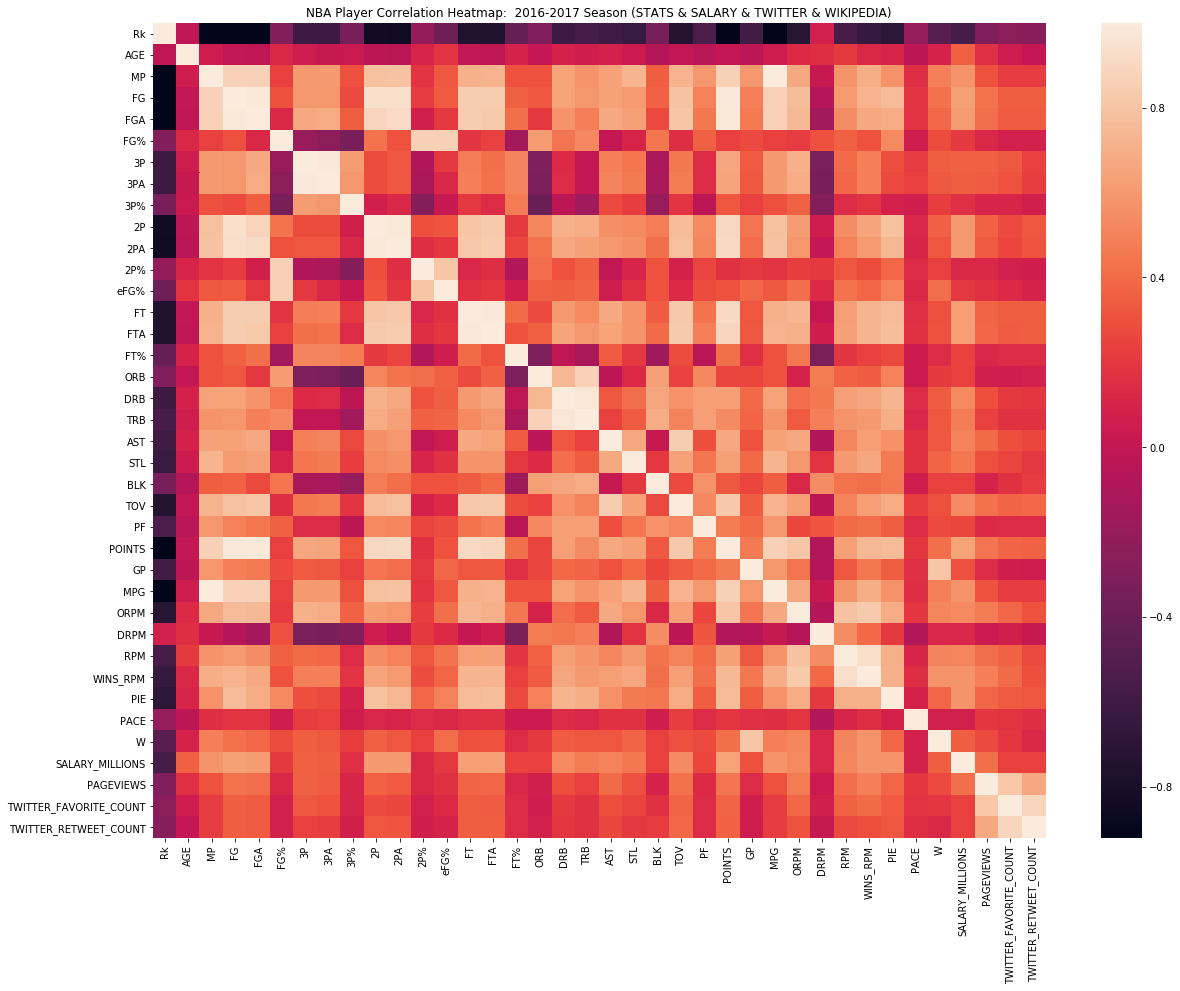

In [41]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season (STATS & SALARY & TWITTER & WIKIPEDIA)")
corr = nba_players_with_salary_wiki_twitter_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [84]:
nba_players_with_salary_wiki_twitter_df = nba_players_with_salary_wiki_twitter_df.dropna()
numerical_df = nba_players_with_salary_wiki_twitter_df.loc[:,["AGE", 
"TRB", "AST", "STL", "TOV", "BLK", "PF", "POINTS", "MPG", "WINS_RPM", 
"W", "SALARY_MILLIONS", "PAGEVIEWS", "TWITTER_RETWEET_COUNT"]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(numerical_df))
print(scaler.transform(numerical_df))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[ 0.42857143  0.8359375   0.92792793 ...,  0.85566343  0.24344708
   0.1900714 ]
 [ 0.38095238  0.6328125   1.         ...,  0.85566343  0.18652702
   0.10931656]
 [ 0.19047619  0.921875    0.18018018 ...,  0.71391586  0.00458206
   0.03536212]
 ..., 
 [ 0.80952381  0.125       0.04504505 ...,  0.11941748  0.016023
   0.00408024]
 [ 0.28571429  0.0859375   0.03603604 ...,  0.04919094  0.00119532
   0.0034002 ]
 [ 0.14285714  0.109375    0.01801802 ...,  0.04563107  0.00725731
   0.00102006]]


In [85]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5)
kmeans = k_means.fit(scaler.transform(numerical_df))
nba_players_with_salary_wiki_twitter_df['cluster'] = kmeans.labels_

In [87]:
nba_players_with_salary_wiki_twitter_df.to_csv("../data/nba_2017_players_social_with_clusters.csv")

In [88]:
nba_players_with_salary_wiki_twitter_df.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,cluster
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,186.605263,26.359649,23.617105,3.960088,8.751316,0.447048,0.992105,2.776754,0.304531,2.967982,...,-0.271228,3.568026,9.682456,98.541009,31.425439,8.186579,779.171053,245.116228,94.710526,1.916667
std,128.752169,4.425850,8.323986,2.260625,4.735576,0.067219,0.802435,2.049268,0.119978,1.921013,...,2.693154,4.258697,3.542822,2.643495,14.000587,7.004311,1736.129307,1042.283527,340.966241,1.342981
min,1.000000,19.000000,5.600000,0.500000,1.200000,0.200000,0.000000,0.000000,0.000000,0.300000,...,-6.600000,-2.320000,-0.400000,91.120000,1.000000,0.060000,2.000000,0.000000,0.000000,0.000000
25%,73.750000,23.000000,17.000000,2.200000,5.100000,0.405750,0.300000,1.200000,0.287500,1.375000,...,-2.152500,0.280000,7.300000,97.092500,23.000000,2.677500,149.625000,3.750000,8.000000,1.000000
50%,166.500000,26.000000,24.600000,3.550000,7.750000,0.444000,0.800000,2.450000,0.343000,2.450000,...,-0.725000,2.175000,9.100000,98.420000,31.000000,5.405000,330.750000,24.000000,15.250000,2.000000
75%,290.250000,29.000000,31.050000,5.300000,11.700000,0.477000,1.500000,4.125000,0.375000,4.225000,...,1.262500,5.522500,11.700000,100.145000,40.000000,12.087500,663.750000,88.750000,51.500000,3.000000
max,460.000000,40.000000,37.800000,10.300000,24.000000,0.667000,4.100000,10.000000,0.538000,9.700000,...,8.420000,20.430000,23.000000,106.860000,66.000000,30.960000,17570.500000,12278.000000,2941.000000,4.000000


In [84]:
endorsement_df = pd.read_csv("../data/nba_2017_endorsements.csv")
endorsement_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
endorsement_df.head()

,PLAYER,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


In [85]:
endorsement_value_df = endorsement_df.merge(attendance_valuation_elo_df)
endorsement_value_df.drop("Unnamed: 0", inplace=True, axis=1)
endorsement_value_df.drop("GMS", inplace=True, axis=1)
endorsement_value_df.drop("SALARY_MILLIONS", inplace=True, axis=1)

In [86]:
endorsement_value_df

,PLAYER,TEAM,ENDORSEMENT_MILLIONS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,LeBron James,Cleveland Cavaliers,55,100,0.843042,0.020562,1200.0,1545,East
1,Kyrie Irving,Cleveland Cavaliers,13,100,0.843042,0.020562,1200.0,1545,East
2,Kevin Durant,Golden State Warriors,36,100,0.803436,0.019596,2600.0,1770,West
3,Stephen Curry,Golden State Warriors,35,100,0.803436,0.019596,2600.0,1770,West
4,James Harden,Houston Rockets,20,94,0.695903,0.016973,1650.0,1602,West
5,Russell Westbrook,Oklahoma City Thunder,15,100,0.746323,0.018203,1025.0,1543,West
6,Dwyane Wade,Chicago Bulls,13,104,0.888882,0.021680,2500.0,1519,East
7,Derrick Rose,New York Knicks,14,100,0.810741,0.019774,3300.0,1374,East
8,Carmelo Anthony,New York Knicks,8,100,0.810741,0.019774,3300.0,1374,East
9,Chris Paul,Los Angeles Clippers,8,100,0.782609,0.019088,2000.0,1636,West


In [87]:
endorsement_value_stats_df = endorsement_value_df.merge(nba_players_with_salary_wiki_twitter_df,how="inner", on="PLAYER")

In [ ]:
endorsement_value_stats_df.to_csv("../data/nba_2017_att_val.csv")

In [88]:
endorsement_value_stats_df.corr()

,ENDORSEMENT_MILLIONS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,Rk,AGE,MP,FG,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
ENDORSEMENT_MILLIONS,1.000000,-0.074306,0.125005,0.125028,-0.239419,0.465757,-0.473741,0.029488,0.532653,0.530715,...,0.479136,0.570346,0.635054,0.313954,0.330321,0.599848,0.244687,0.809983,0.595061,0.409703
PCT,-0.074306,1.000000,0.854332,0.854346,0.238631,-0.136504,0.508213,0.536777,-0.624804,-0.194534,...,0.181126,-0.291991,-0.406363,-0.396602,-0.418478,-0.441505,-0.173259,0.107653,0.014153,0.025068
TOTAL_MILLIONS,0.125005,0.854332,1.000000,1.000000,0.225686,-0.190409,0.441415,0.446302,-0.365703,-0.139626,...,0.060490,-0.368823,-0.444558,-0.623015,-0.532115,-0.378214,-0.177570,0.243391,0.058589,0.113360
AVG_MILLIONS,0.125028,0.854346,1.000000,1.000000,0.225650,-0.190366,0.441390,0.446289,-0.365698,-0.139598,...,0.060529,-0.368776,-0.444517,-0.622974,-0.532093,-0.378175,-0.177576,0.243416,0.058613,0.113361
VALUE_MILLIONS,-0.239419,0.238631,0.225686,0.225650,1.000000,-0.227356,0.591631,0.299777,-0.539895,-0.584957,...,-0.218205,-0.566579,-0.625420,-0.682789,-0.035688,-0.489445,-0.283792,-0.102623,-0.004293,0.240855
ELO,0.465757,-0.136504,-0.190409,-0.190366,-0.227356,1.000000,-0.381297,-0.244167,-0.008865,0.139849,...,0.575989,0.715941,0.626730,0.492768,0.705340,0.828870,-0.233741,0.466661,0.476510,0.066862
Rk,-0.473741,0.508213,0.441415,0.441390,0.591631,-0.381297,1.000000,0.474310,-0.778643,-0.875173,...,0.044703,-0.523799,-0.708079,-0.601686,-0.608732,-0.723024,-0.164240,-0.376137,-0.323192,0.021291
AGE,0.029488,0.536777,0.446302,0.446289,0.299777,-0.244167,0.474310,1.000000,-0.383661,-0.408581,...,0.392396,-0.116076,-0.191207,-0.200509,-0.494261,-0.455436,0.359643,0.049190,-0.126321,-0.237298
MP,0.532653,-0.624804,-0.365703,-0.365698,-0.539895,-0.008865,-0.778643,-0.383661,1.000000,0.758705,...,-0.065057,0.411843,0.591691,0.405394,0.171134,0.478440,0.382743,0.322506,0.199189,0.090765
FG,0.530715,-0.194534,-0.139626,-0.139598,-0.584957,0.139849,-0.875173,-0.408581,0.758705,1.000000,...,-0.077354,0.368877,0.551537,0.486730,0.369516,0.484935,0.245507,0.394205,0.280957,0.098492


In [89]:
results = smf.ols('ENDORSEMENT_MILLIONS ~PAGEVIEWS', data=endorsement_value_stats_df).fit()

In [90]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     ENDORSEMENT_MILLIONS   R-squared:                       0.656
Model:                              OLS   Adj. R-squared:                  0.613
Method:                   Least Squares   F-statistic:                     15.26
Date:                  Tue, 01 Aug 2017   Prob (F-statistic):            0.00450
Time:                          09:56:46   Log-Likelihood:                -35.645
No. Observations:                    10   AIC:                             75.29
Df Residuals:                         8   BIC:                             75.90
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0826      5.011

/Users/noahgift/.socialpowernba/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


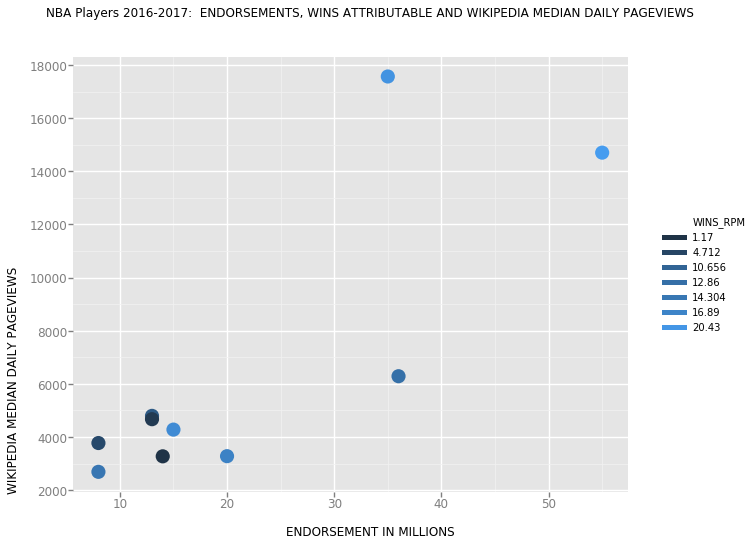

<ggplot: (-9223372036569848807)>

In [99]:
p = ggplot(endorsement_value_stats_df,aes(x="ENDORSEMENT_MILLIONS", y="PAGEVIEWS", color="WINS_RPM")) + geom_point(size=200)
p + xlab("ENDORSEMENT IN MILLIONS") + ylab("WIKIPEDIA MEDIAN DAILY PAGEVIEWS") + ggtitle("NBA Players 2016-2017:  ENDORSEMENTS, WINS ATTRIBUTABLE AND WIKIPEDIA MEDIAN DAILY PAGEVIEWS") 

In [208]:
endorsements = pd.read_csv("../data/nba_2017_endorsement_full_stats.csv")

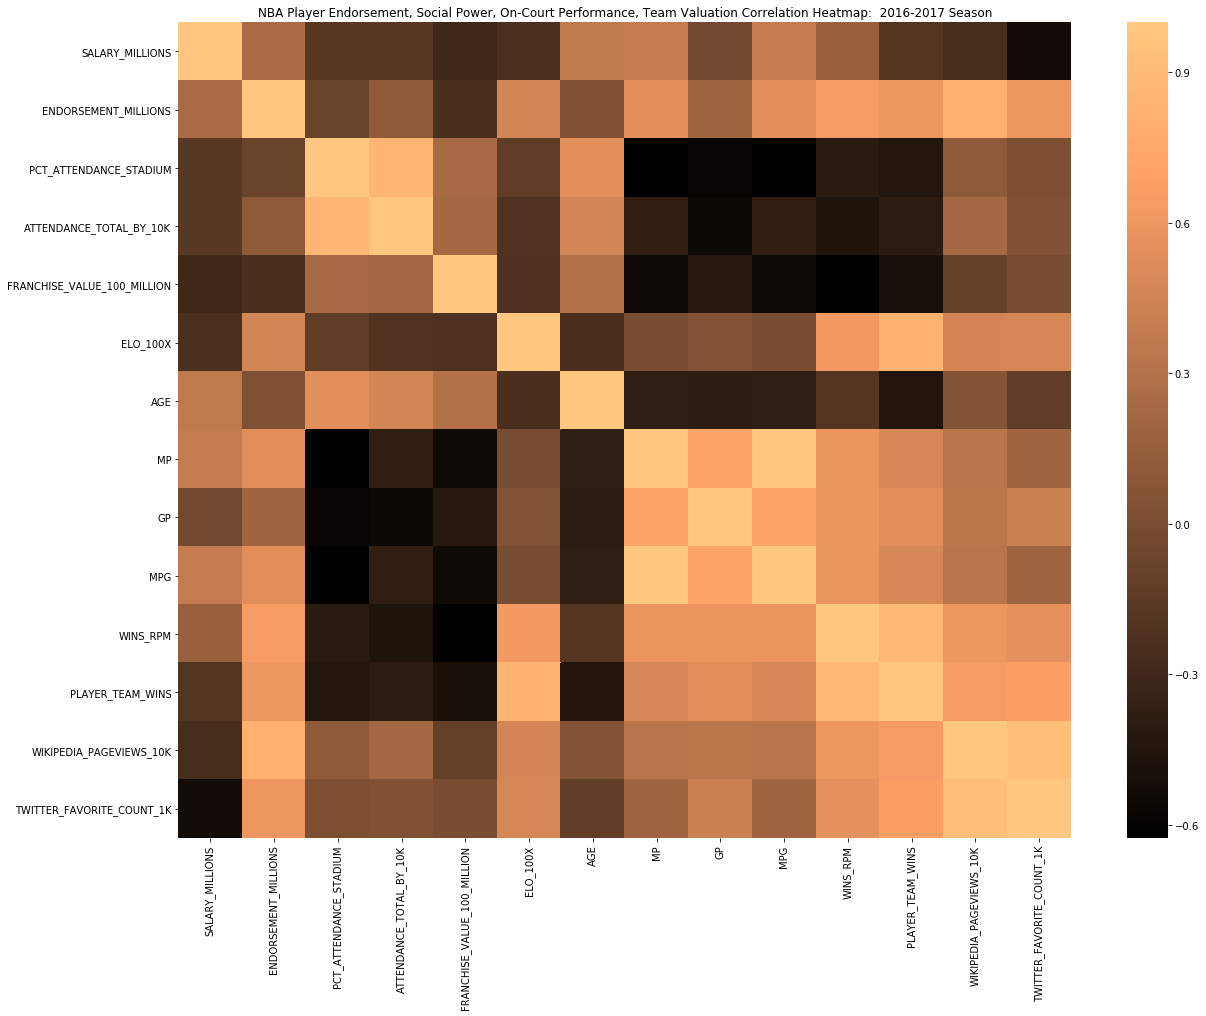

In [215]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Player Endorsement, Social Power, On-Court Performance, Team Valuation Correlation Heatmap:  2016-2017 Season")
corr = endorsements.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="copper")

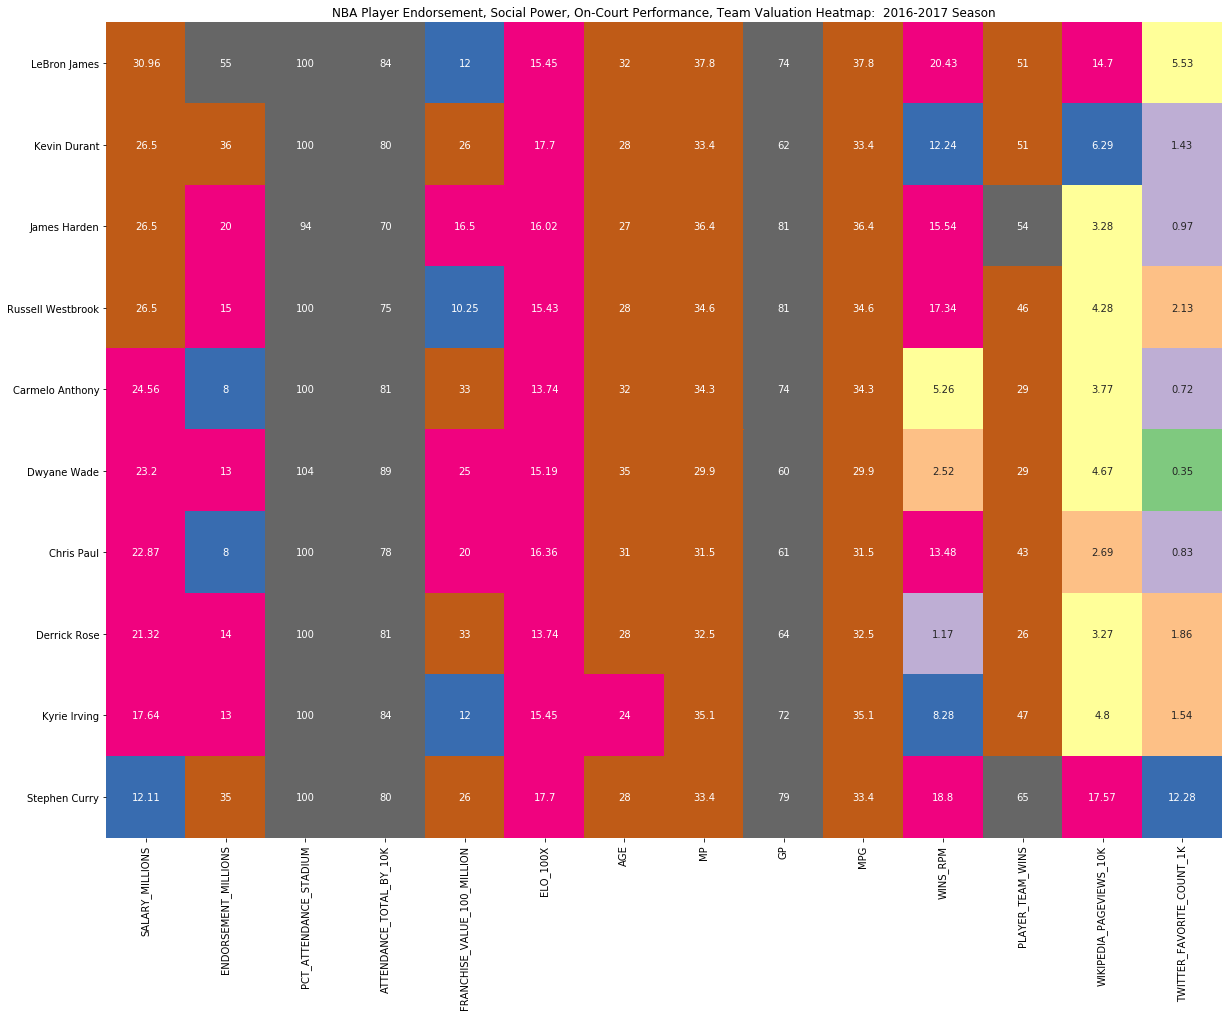

In [207]:
from matplotlib.colors import LogNorm
plt.subplots(figsize=(20,15))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
norm = LogNorm()
ax = plt.axes()
grid = endorsements.select_dtypes([np.number])
ax.set_title("NBA Player Endorsement, Social Power, On-Court Performance, Team Valuation Heatmap:  2016-2017 Season")
sns.heatmap(grid,annot=True, yticklabels=endorsements["PLAYER"],fmt='g', cmap="Accent", cbar=False, norm=norm)

In [148]:
grid = endorsements.select_dtypes([np.number])

In [162]:
grid.describe()

,ENDORSEMENT_MILLIONS,PCT,TOTAL_MILLIONS,VALUE_MILLIONS,ELO,AGE,MP,eFG%,GP,MPG,WINS_RPM,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,21.700,99.800,0.802,2137.500,1567.800,29.300,33.890,0.530,70.800,33.890,11.506,44.100,23.216,6532.450,2764.050,938.850
std,15.363,2.394,0.052,850.755,136.114,3.164,2.304,0.050,8.390,2.304,6.868,12.591,5.294,5204.873,3646.260,1012.012
min,8.000,94.000,0.700,1025.000,1374.000,24.000,29.900,0.460,60.000,29.900,1.170,26.000,12.110,2689.500,349.500,149.500
25%,13.000,100.000,0.785,1312.500,1525.000,28.000,32.725,0.482,62.500,32.725,6.015,32.500,21.707,3402.625,864.000,245.375
50%,14.500,100.000,0.805,2250.000,1545.000,28.000,33.850,0.535,73.000,33.850,12.860,46.500,23.880,4475.000,1483.250,462.500
75%,31.250,100.000,0.833,2600.000,1627.500,31.750,34.975,0.575,77.750,34.975,16.890,51.000,26.500,5915.375,2063.875,1299.875
max,55.000,104.000,0.890,3300.000,1770.000,35.000,37.800,0.590,81.000,37.800,20.430,65.000,30.960,17570.500,12278.000,2893.000
